In [1]:
import pandas as pd
import numpy as np
#import sys
from numpy import NaN
from scipy import stats
import statistics
import matplotlib.pyplot as plt
#from matplotlib_venn import venn2
from sklearn.svm import SVC
#from sklearn.cluster import KMeans
#from scipy import signal
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
#from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import plot_confusion_matrix

#%matplotlib inline  
#%matplotlib notebook
#%pylab

In [2]:
# uncomment this if you want to see all the dataframe
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [3]:
DU145_TGF_scRNAseq = pd.read_csv('DU145_TGFB1.normalized.txt',sep='\t',index_col=0)
DU145_EGF_scRNAseq = pd.read_csv('DU145_EGF.normalized.txt',sep='\t',index_col=0)
DU145_TNF_scRNAseq = pd.read_csv('DU145_TNF.normalized.txt',sep='\t',index_col=0)

DU145_TGF_scRNAseq

,AAAGGATAGAGCTGCA,AAAGGATAGAGTGAAG,AAAGGATAGGCGTCCT,AAAGGGCCAGCAGAAC,AAAGTGAAGTCACTAC,AACAAAGGTGCCAAGA,AACAAGACATACTGAC,AACAGGGCATTGCTGA,AACCAACTCACCTCTG,AACCACAGTATCGAAA,...,TTCAGGACAACGGTAG,TTGCCTGCAAGCACAG,TTGTGGAGTCTGTAGT,TTGTGTTCATTGAGCT,TTTCACATCCGCGGAT,ACGCACGTCTGCACCT,CACCAAATCAAAGGTA,GGGTCACCAGGTAGTG,TCAGTGAGTGGCCTCA,TTGGGCGCAAATCGTC
AL669831.5,0.000000,0.668864,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAM41C,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SAMD11,0.000000,0.000000,0.000000,1.013642,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NOC2L,0.603985,0.000000,0.000000,1.013642,1.360820,0.00000,0.650241,0.000000,1.111031,0.000000,...,0.802754,0.000000,0.000000,0.000000,0.000000,1.781110,1.250402,0.000000,1.060228,0.000000
KLHL17,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-CYB,4.756050,4.856477,5.211208,5.295237,2.271938,5.20883,4.487920,4.777599,4.437190,5.655847,...,5.126985,5.302625,5.006468,5.009532,4.637731,4.301529,4.876675,5.430968,5.079966,5.107567
BX004987.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC007325.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AL354822.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
DU145_TGF_metadata = pd.read_csv('DU145_TGFB1_metadata.txt',sep='\t',index_col=0)
DU145_EGF_metadata = pd.read_csv('DU145_EGF_metadata.txt',sep='\t',index_col=0)
DU145_TNF_metadata = pd.read_csv('DU145_TNF_metadata.txt',sep='\t',index_col=0)

DU145_TGF_metadata

,orig.ident,nCount_RNA,nFeature_RNA,percent.mito,Barcode,Drug,Target,CellLine,Treatment,Doublet,Condition,DrugBroad,ConditionBroad,S.Score,G2M.Score,Phase,RNA_snn_res.0.1,seurat_clusters,RNA_snn_res.0.25
AAAGGATAGAGCTGCA,Plate2,12057,3287,0.153935,Bar66,BIBF 1120,VEGFR,DU145,TGFB1,Singlet,TGFB1_BIBF 1120,Inhibited,TGFB1_Inhibited,-0.074444,-0.129461,G1,0,1,1
AAAGGATAGAGTGAAG,Plate2,10504,3423,0.153561,Bar56,LY364947,TGFB1,DU145,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,0.344879,-0.001452,S,0,0,0
AAAGGATAGGCGTCCT,Plate2,3291,1590,0.210270,Bar56,LY364947,TGFB1,DU145,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,-0.192083,-0.276594,G1,0,1,1
AAAGGGCCAGCAGAAC,Plate2,5696,2261,0.218399,Bar56,LY364947,TGFB1,DU145,TGFB1,Singlet,TGFB1_LY364947,Inhibited,TGFB1_Inhibited,-0.069835,0.316485,G2M,0,1,1
AAAGTGAAGTCACTAC,Plate2,3449,1762,0.009858,Bar59,PD 0325901,MEK,DU145,TGFB1,Singlet,TGFB1_PD 0325901,Inhibited,TGFB1_Inhibited,-0.280197,-0.346733,G1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACGCACGTCTGCACCT,Plate2,8103,2989,0.099469,Bar73,Uninhibited_Untreated,Uninhibited_Untreated,DU145,Untreated,Singlet,Untreated_Control,Uninhibited,Untreated_Uninhibited,-0.036046,-0.389909,G1,4,1,1
CACCAAATCAAAGGTA,Plate2,16053,4326,0.129571,Bar73,Uninhibited_Untreated,Uninhibited_Untreated,DU145,Untreated,Singlet,Untreated_Control,Uninhibited,Untreated_Uninhibited,0.144019,0.002125,S,4,1,1
GGGTCACCAGGTAGTG,Plate2,4662,1982,0.192192,Bar73,Uninhibited_Untreated,Uninhibited_Untreated,DU145,Untreated,Singlet,Untreated_Control,Uninhibited,Untreated_Uninhibited,0.126184,-0.272031,S,4,1,1
TCAGTGAGTGGCCTCA,Plate2,15898,4119,0.170336,Bar87,Uninhibited_Untreated,Uninhibited_Untreated,DU145,Untreated,Singlet,Untreated_Control,Uninhibited,Untreated_Uninhibited,0.253682,-0.154748,S,4,1,1


In [5]:
DU145_TGF_init_ctrls = DU145_TGF_scRNAseq[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)
DU145_EGF_init_ctrls = DU145_EGF_scRNAseq[DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)
DU145_TNF_init_ctrls = DU145_TNF_scRNAseq[DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index].mean(axis=1)


In [6]:
# normalizing the datasets
DU145_TGF_scRNAseq_norm_ = DU145_TGF_scRNAseq.subtract(DU145_TGF_init_ctrls,axis=0)
DU145_EGF_scRNAseq_norm_ = DU145_EGF_scRNAseq.subtract(DU145_EGF_init_ctrls,axis=0)
DU145_TNF_scRNAseq_norm_ = DU145_TNF_scRNAseq.subtract(DU145_TNF_init_ctrls,axis=0)


In [7]:
# taking intersection of genes
genes_list_DU145 = list(set(DU145_TGF_scRNAseq_norm_.index) & set(DU145_EGF_scRNAseq_norm_.index) & set(DU145_TNF_scRNAseq_norm_.index))
print(len(genes_list_DU145))
DU145_TGF_scRNAseq_norm = DU145_TGF_scRNAseq_norm_.loc[genes_list_DU145].copy()
DU145_EGF_scRNAseq_norm = DU145_EGF_scRNAseq_norm_.loc[genes_list_DU145].copy()
DU145_TNF_scRNAseq_norm = DU145_TNF_scRNAseq_norm_.loc[genes_list_DU145].copy()


13018


In [8]:
# read drugs legend
dr_legend = pd.read_excel('drugs_legend.xlsx',index_col=0)
dr_legend

,Target
Drug,
PKC 412,PKC
Doramapimod,p38
Erlotinib,EGFR
NVP-BEZ235,PI3K
Phthalazinone Pyrazole,Aurora-A
Torin 1,mTOR
BIBF 1120,VGFR/PDGFR/FGFR
CAY10657,IKK2
Ruxolitinib,JAK


In [9]:
# calculating STV
trainset_epi = DU145_TGF_scRNAseq_norm[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index]
trainset_mes = DU145_TGF_scRNAseq_norm[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index]
gene_trainset = pd.concat([trainset_epi,trainset_mes],axis=1)

cls = list(np.full(len(trainset_epi.columns),0)) + list(np.full(len(trainset_mes.columns),1))

svc = SVC(kernel='linear')
svc.fit(gene_trainset.transpose(),cls)
b_coeff = -svc.intercept_[0]/linalg.norm(svc.coef_[0])
norm_vec = svc.coef_[0]/linalg.norm(svc.coef_[0])

epi_cnt = trainset_epi.mean(axis=1)
mes_cnt = trainset_mes.mean(axis=1)
s_vec = (mes_cnt - epi_cnt)/linalg.norm(mes_cnt - epi_cnt)

norm_vec_df = pd.DataFrame(s_vec,index=gene_trainset.index,columns=['s_vec'])
norm_vec_df.insert(0,'norm_vec',norm_vec)
# plot STV ranking
#norm_vec_df.to_csv('Phospho_MS_STV.csv')
#norm_vec_df.sort_values(by='norm_vec')

angle = (np.arccos(np.dot(norm_vec,s_vec))/np.pi)*180
angle

40.46841421356229

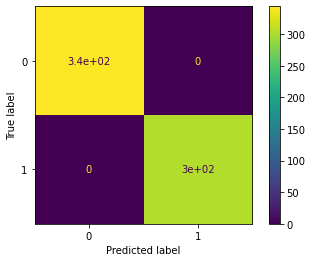

In [10]:
plot_confusion_matrix(svc,gene_trainset.transpose(),cls)
# clear separation

In [11]:
norm_vec_df.to_csv('EMT_STV_scRNAseq_DU145.csv')
norm_vec_df.sort_values(by='norm_vec')

,norm_vec,s_vec
LY6K,-0.111230,-0.119605
AREG,-0.089062,-0.091016
KRT19,-0.087211,-0.060605
PDLIM2,-0.080076,-0.084242
ID1,-0.071334,-0.050489
...,...,...
OCIAD2,0.114092,0.107211
TAGLN,0.123000,0.177734
TPM1,0.123503,0.156313
TP53I3,0.125681,0.132813


In [12]:
norm_vec_df.loc['CDH1']

norm_vec   -0.010355
s_vec      -0.006603
Name: CDH1, dtype: float64

In [13]:
# run PCA and plot separation

pca = PCA(n_components=3)
Spca = pca.fit_transform(gene_trainset.transpose())
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_sc = pd.DataFrame(Spca[:,:3],columns=['PC1','PC2','PC3'],index=gene_trainset.columns)
PCA_sc

Explained variances by components:  [0.01883787 0.0141558  0.01132839] total variance explained:  0.04432205653057382


,PC1,PC2,PC3
AAAGGATGTTCCCAAA,0.290322,3.211926,5.503166
AAAGGGCAGACGACTG,-6.016670,2.708287,-0.867054
AAAGGGCCACTTGGGC,-4.455506,4.114016,2.736168
AACACACTCGAACCAT,-3.491562,-2.906043,2.081684
AACCACACAAGCCCAC,-3.994496,-3.708902,-4.670583
...,...,...,...
GCACGTGTCCATATGG,-6.706478,-5.043847,1.675788
AACTTCTTCAGCTCTC,-5.089228,-0.917540,3.460028
ACGTCCTGTGTCCATA,-3.384374,1.770306,-0.824603
GTTGTAGAGGAATCGC,-1.800054,-0.807810,-4.230032


In [14]:
trainset_epi_PCA = PCA_sc.loc[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index]
trainset_mes_PCA = PCA_sc.loc[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index]
gene_trainset_PCA = pd.concat([trainset_epi_PCA,trainset_mes_PCA],axis=0)

cls_PCA = list(np.full(len(trainset_epi_PCA.index),0)) + list(np.full(len(trainset_mes_PCA.index),1))

svc_PCA = SVC(kernel='linear')
svc_PCA.fit(gene_trainset_PCA,cls_PCA)

print(svc_PCA.intercept_)


[0.18379253]


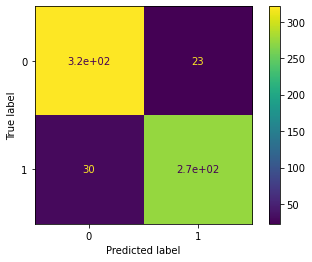

In [15]:
plot_confusion_matrix(svc_PCA,gene_trainset_PCA,cls_PCA)
# PCA introduces distortion to the data

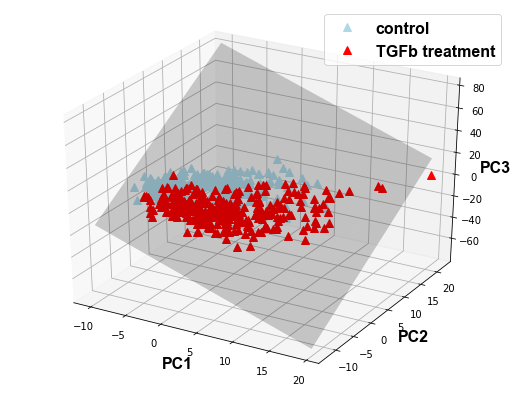

In [16]:
# 3D visualization with plane


fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

z2 = lambda x,y: (-svc_PCA.intercept_-svc_PCA.coef_[0][0]*x-svc_PCA.coef_[0][1]*y) / svc_PCA.coef_[0][2]
tmpx = np.linspace(min(gene_trainset_PCA.iloc[:,0]),max(gene_trainset_PCA.iloc[:,0]),10)
tmpy = np.linspace(min(gene_trainset_PCA.iloc[:,1]),max(gene_trainset_PCA.iloc[:,1]),10)
xs,ys = np.meshgrid(tmpx,tmpy)
zs = z2(xs,ys)

ax.plot_surface(xs, ys, zs,color='black',linewidth=0,alpha=0.2)


ax.plot3D(PCA_sc.loc[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].iloc[:,0],PCA_sc.loc[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].iloc[:,1],PCA_sc.loc[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].iloc[:,2],'^',color='lightblue',label='control',ms=8) 

ax.plot3D(PCA_sc.loc[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].iloc[:,0],PCA_sc.loc[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].iloc[:,1],PCA_sc.loc[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].iloc[:,2],'^',color='red',label='TGFb treatment',ms=8) 


#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLabel,ncol=1)
plt.show()



In [17]:
# entring parameters for plots
drug_plot='NVP-BEZ235'
gene_name='VIM'

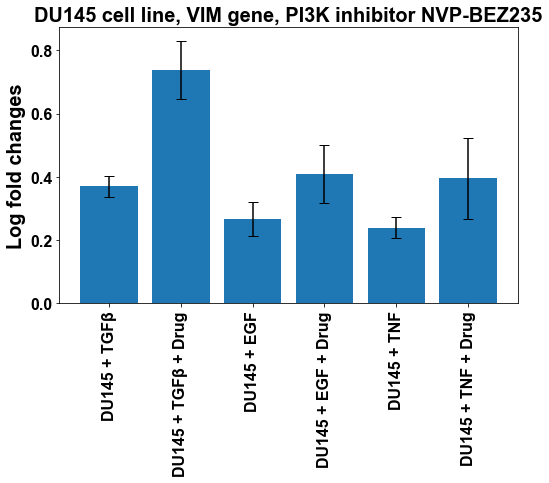

In [18]:
# make bar plot for all cells
names = ['DU145 + TGFβ','DU145 + TGFβ + Drug','DU145 + EGF','DU145 + EGF + Drug','DU145 + TNF','DU145 + TNF + Drug']

if drug_plot in list(set(DU145_TGF_metadata['Drug'])):
    DU145_TGF_gene_ctrl = statistics.mean(DU145_TGF_scRNAseq_norm[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    DU145_TGF_gene_ctrl_err = stats.sem(DU145_TGF_scRNAseq_norm[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    DU145_TGF_gene_drug = statistics.mean(DU145_TGF_scRNAseq_norm[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    DU145_TGF_gene_drug_err = stats.sem(DU145_TGF_scRNAseq_norm[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    DU145_TGF_gene_ctrl = statistics.mean(DU145_TGF_scRNAseq_norm[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    DU145_TGF_gene_ctrl_err = stats.sem(DU145_TGF_scRNAseq_norm[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
    DU145_TGF_gene_drug = 0
    DU145_TGF_gene_drug_err = 0

if drug_plot in list(set(DU145_EGF_metadata['Drug'])):
    DU145_EGF_gene_ctrl = statistics.mean(DU145_EGF_scRNAseq_norm[DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    DU145_EGF_gene_ctrl_err = stats.sem(DU145_EGF_scRNAseq_norm[DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    DU145_EGF_gene_drug = statistics.mean(DU145_EGF_scRNAseq_norm[DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    DU145_EGF_gene_drug_err = stats.sem(DU145_EGF_scRNAseq_norm[DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    DU145_EGF_gene_ctrl = statistics.mean(DU145_EGF_scRNAseq_norm[DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    DU145_EGF_gene_ctrl_err = stats.sem(DU145_EGF_scRNAseq_norm[DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
    DU145_EGF_gene_drug = 0
    DU145_EGF_gene_drug_err = 0

if drug_plot in list(set(DU145_TNF_metadata['Drug'])):
    DU145_TNF_gene_ctrl = statistics.mean(DU145_TNF_scRNAseq_norm[DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    DU145_TNF_gene_ctrl_err = stats.sem(DU145_TNF_scRNAseq_norm[DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    DU145_TNF_gene_drug = statistics.mean(DU145_TNF_scRNAseq_norm[DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
    DU145_TNF_gene_drug_err = stats.sem(DU145_TNF_scRNAseq_norm[DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    DU145_TNF_gene_ctrl = statistics.mean(DU145_TNF_scRNAseq_norm[DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    DU145_TNF_gene_ctrl_err = stats.sem(DU145_TNF_scRNAseq_norm[DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
    DU145_TNF_gene_drug = 0
    DU145_TNF_gene_drug_err = 0

values = [DU145_TGF_gene_ctrl,DU145_TGF_gene_drug,DU145_EGF_gene_ctrl,DU145_EGF_gene_drug,DU145_TNF_gene_ctrl,DU145_TNF_gene_drug]
errs = [DU145_TGF_gene_ctrl_err,DU145_TGF_gene_drug_err,DU145_EGF_gene_ctrl_err,DU145_EGF_gene_drug_err,DU145_TNF_gene_ctrl_err,DU145_TNF_gene_drug_err]

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.title('DU145 cell line, ' + gene_name + ' gene, ' + dr_legend.loc[drug_plot,'Target'] + ' inhibitor ' + drug_plot,**fontTitle)
plt.ylabel('Log fold changes',**fontLabel)
plt.bar(names,values,yerr=errs,capsize=5)
plt.xticks(rotation='vertical')
fig.tight_layout()
plt.show()

In [19]:
# plotting DPD distribution
drug_plot='Necrostatin-5'

DPD for epithelial state = -4.279616187004623 ± 0.016196155173929506
DPD for TGFb control = 4.635900969343337 ± 0.0496767384971235
DPD for RIPK1 inhibitor = -0.6575988437953674 ± 0.08895976830399245


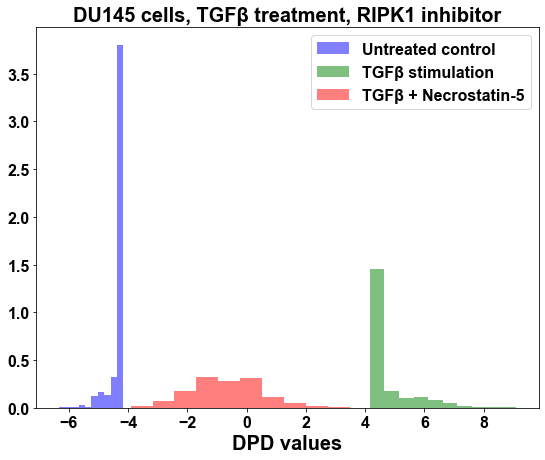

In [20]:
DPDs_epi = []
for code in DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='TGFβ + ' + drug_plot,alpha=0.5) 

plt.title('DU145 cells, TGFβ treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -4.279616187004623 ± 0.016196155173929506
DPD for TGFb control = 4.635900969343337 ± 0.0496767384971235
DPD for RIPK1 inhibitor = -0.6575988437953674 ± 0.08895976830399245


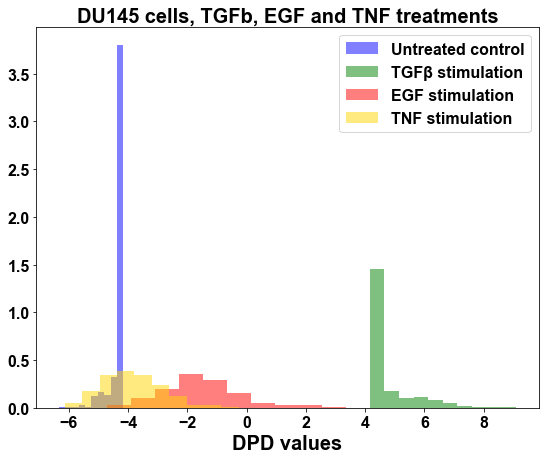

In [21]:
DPDs_epi = []
for code in DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_EGF = []
for code in DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index:
    DPDs_EGF.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_TNF = []
for code in DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == drug_plot].index:
    DPDs_TNF.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DPDs_EGF, bins=10,density=True,color='red',label='EGF stimulation',alpha=0.5) 
plt.hist(DPDs_TNF, bins=10,density=True,color='gold',label='TNF stimulation',alpha=0.5) 

plt.title('DU145 cells, TGFb, EGF and TNF treatments',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

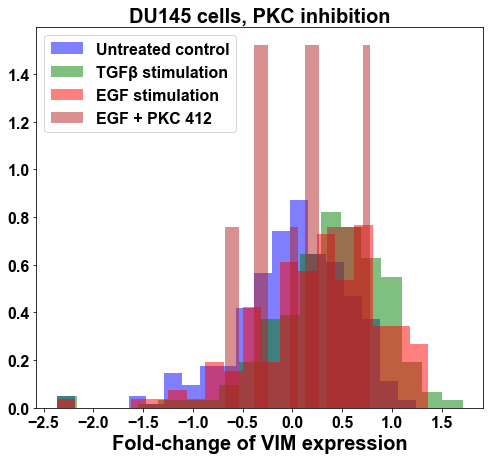

In [22]:
# plot distribution for specific gene
gene_name='VIM'
drug_plot='PKC 412'

DU145_TGF_gene_notr = list(DU145_TGF_scRNAseq_norm[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
DU145_TGF_gene_ctrl = list(DU145_TGF_scRNAseq_norm[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index].loc[gene_name])
if drug_plot in list(set(DU145_TGF_metadata['Drug'])):
    DU145_TGF_gene_drug = list(DU145_TGF_scRNAseq_norm[DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    DU145_TGF_gene_drug = []

DU145_EGF_gene_notr = list(DU145_EGF_scRNAseq_norm[DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
DU145_EGF_gene_ctrl = list(DU145_EGF_scRNAseq_norm[DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index].loc[gene_name])
if drug_plot in list(set(DU145_EGF_metadata['Drug'])):
    DU145_EGF_gene_drug = list(DU145_EGF_scRNAseq_norm[DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    DU145_EGF_gene_drug = []

DU145_TNF_gene_notr = list(DU145_TNF_scRNAseq_norm[DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index].loc[gene_name])
DU145_TNF_gene_ctrl = list(DU145_TNF_scRNAseq_norm[DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index].loc[gene_name])
if drug_plot in list(set(DU145_TNF_metadata['Drug'])):
    DU145_TNF_gene_drug = list(DU145_TNF_scRNAseq_norm[DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == drug_plot].index].loc[gene_name])
else:
    DU145_TNF_gene_drug = []

fig = plt.figure(figsize=(8,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

plt.hist(DU145_TGF_gene_notr, bins=20,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DU145_TGF_gene_ctrl, bins=20,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DU145_EGF_gene_ctrl, bins=20,density=True,color='red',label='EGF stimulation',alpha=0.5)
plt.hist(DU145_EGF_gene_drug, bins=20,density=True,color='firebrick',label='EGF + ' + drug_plot,alpha=0.5)

plt.title('DU145 cells, '+ dr_legend.loc[drug_plot]['Target'] + ' inhibition',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('Fold-change of ' + gene_name + ' expression',**fontLabel)

plt.show()

DPD for epithelial state = -4.279616187004623 ± 0.016196155173929506
DPD for TGFb control = 4.635900969343337 ± 0.0496767384971235
DPD for PKC inhibitor = 0.3742090570430595 ± 0.46073104329125164


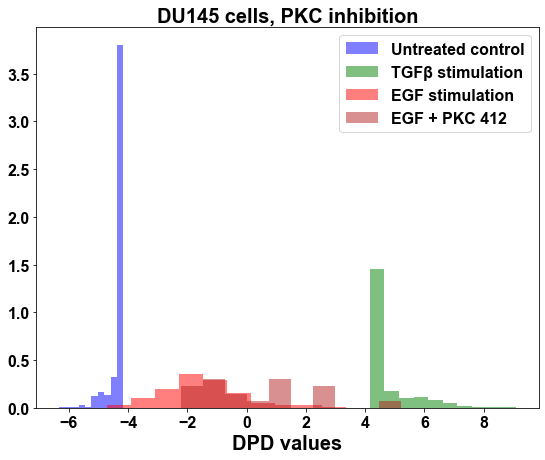

In [23]:
DPDs_epi = []
for code in DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == 'Uninhibited_TGFB1'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_EGF = []
for code in DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index:
    DPDs_EGF.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TGFb control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TGFβ stimulation',alpha=0.5)
plt.hist(DPDs_EGF, bins=10,density=True,color='red',label='EGF stimulation',alpha=0.5) 
plt.hist(DPDs_drg, bins=10,density=True,color='firebrick',label='EGF + ' + drug_plot,alpha=0.5) 

plt.title('DU145 cells, '+ dr_legend.loc[drug_plot]['Target'] + ' inhibition',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -4.279616187004623 ± 0.01619615501678384
DPD for EGF control = -1.4969928232467697 ± 0.1112286835989572
DPD for PKC inhibitor = 0.3742090570430595 ± 0.46073104329125164


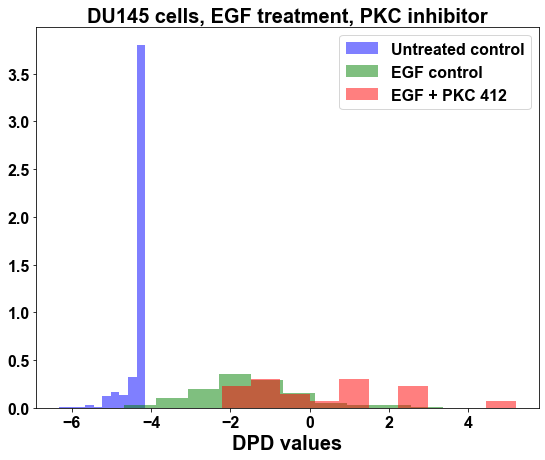

In [24]:
DPDs_epi = []
for code in DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == 'Uninhibited_EGF'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for EGF control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='EGF control',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='EGF + ' + drug_plot,alpha=0.5) 

plt.title('DU145 cells, EGF treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

DPD for epithelial state = -4.279616187004623 ± 0.016196155060805333
DPD for TNF control = -3.2479753968454586 ± 0.05754995207235448
DPD for PKC inhibitor = -0.329895706061201 ± 0.5856051028120921


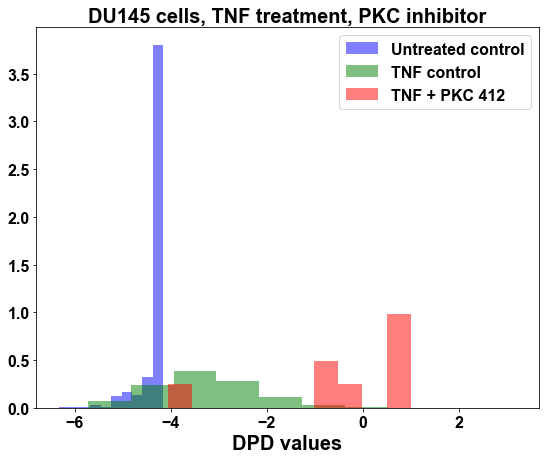

In [25]:
DPDs_epi = []
for code in DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == 'Uninhibited_Untreated'].index:
    DPDs_epi.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_mes = []
for code in DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == 'Uninhibited_TNF'].index:
    DPDs_mes.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

DPDs_drg = []
for code in DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == drug_plot].index:
    DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))

fig = plt.figure(figsize=(9,7))
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 20} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)

print('DPD for epithelial state = ' + str(statistics.mean(DPDs_epi)) + ' ± ' + str(stats.sem(DPDs_epi)))
print('DPD for TNF control = ' + str(statistics.mean(DPDs_mes)) + ' ± ' + str(stats.sem(DPDs_mes)))
print('DPD for ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor = ' + str(statistics.mean(DPDs_drg)) + ' ± ' + str(stats.sem(DPDs_drg)))

plt.hist(DPDs_epi, bins=10,density=True,color='blue',label='Untreated control',alpha=0.5)
plt.hist(DPDs_mes, bins=10,density=True,color='green',label='TNF control',alpha=0.5)
plt.hist(DPDs_drg, bins=10,density=True,color='red',label='TNF + ' + drug_plot,alpha=0.5) 

plt.title('DU145 cells, TNF treatment, ' + dr_legend.loc[drug_plot]['Target'] + ' inhibitor',**fontTitle)
#plt.xlim(0,200)
plt.legend()
plt.xlabel('DPD values',**fontLabel)

plt.show()

In [26]:
# now we need to calculate DPDs
dr_legend['DPD_DU145_TGFB']=np.nan
dr_legend['DPD_DU145_EGF']=np.nan
dr_legend['DPD_DU145_TNF']=np.nan

for drug in list(set(DU145_TGF_metadata['Drug'])):
    #print("Processing data for DU145 cells, TGFB, " + drug)
    DPDs_drg = []
    for code in DU145_TGF_metadata.loc[DU145_TGF_metadata['Drug'] == drug].index:
        DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    dr_legend.at[drug,'DPD_DU145_TGFB'] = statistics.mean(DPDs_drg)

for drug in list(set(DU145_EGF_metadata['Drug'])):
    #print("Processing data for DU145 cells, EGF, " + drug)
    DPDs_drg = []
    for code in DU145_EGF_metadata.loc[DU145_EGF_metadata['Drug'] == drug].index:
        DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_EGF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    dr_legend.at[drug,'DPD_DU145_EGF'] = statistics.mean(DPDs_drg)

for drug in list(set(DU145_TNF_metadata['Drug'])):
    #print("Processing data for DU145 cells, TNF, " + drug)
    DPDs_drg = []
    for code in DU145_TNF_metadata.loc[DU145_TNF_metadata['Drug'] == drug].index:
        DPDs_drg.append(-(b_coeff - np.dot(norm_vec_df['norm_vec'],DU145_TNF_scRNAseq_norm[code]))/np.dot(norm_vec_df['norm_vec'],norm_vec_df['s_vec']))
    dr_legend.at[drug,'DPD_DU145_TNF'] = statistics.mean(DPDs_drg)

dr_legend.to_csv('DU145_EMT_scDPD_vals.csv')
dr_legend

,Target,DPD_DU145_TGFB,DPD_DU145_EGF,DPD_DU145_TNF
Drug,,,,
PKC 412,PKC,3.918469,0.374209,-0.329896
Doramapimod,p38,3.504334,-2.533452,-2.704183
Erlotinib,EGFR,4.458925,-0.759605,-2.104537
NVP-BEZ235,PI3K,4.079725,0.411175,-0.659742
Phthalazinone Pyrazole,Aurora-A,2.550967,-2.898154,-3.223641
Torin 1,mTOR,4.353142,0.605660,0.259371
BIBF 1120,VGFR/PDGFR/FGFR,1.701238,-3.641174,-3.333888
CAY10657,IKK2,2.711238,NaN,-3.142309
Ruxolitinib,JAK,4.066489,-2.626423,-3.199499


In [27]:
KEA_df = pd.read_excel('kinase_screen_signatures.xlsx',index_col=0)
KEA_df

,Target,transcr_targets
Drug,,
LY364947,TGFBR1,"CDH1,TGFB1I1,PPP1CA,WWP2,EGR1,STAT1,OTUB1,SP1,..."
Erlotinib,EGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
Gefitinib,EGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
BIBF 1120,VGFR/PDGFR/FGFR,"ATM,CAV1,HSP90AA1,EGR1,PPARG,FOS,STAT1,PTPN1,H..."
PD 0325901,MEK/ERK,"NFIC,JAK1,GSK3B,STUB1,JUND,TUBB,TGFB1I1,NFATC1..."
NVP-BEZ235,PI3K/mTOR,"FOXO3,RARA,GADD45A,KDM5A,RPS3,PPP2R1A,EGR1,GSK..."
Torin 1,PI3K/mTOR,"FOXO3,RARA,GADD45A,KDM5A,RPS3,PPP2R1A,EGR1,GSK..."
PKC 412,PKC,"ELF3,HNRNPD,AURKA,PA2G4,RB1,GADD45A,KDM1A,FBXW..."
Doramapimod,p38,"SVIL,AURKA,STAG1,GSK3B,YY1,USP37,JUND,FOXM1,TU..."


In [28]:
# preparing modules and perturbation lists
perturbations = list(KEA_df.index)
modules = []
for pert in perturbations:
    if len(modules) > 0:
        if KEA_df.loc[pert,'Target'] != modules[-1]:
            modules.append(KEA_df.loc[pert,'Target'])
    else: 
        modules.append(KEA_df.loc[pert,'Target'])
modules.append('DPD')
print("Our modules are: " + ", ".join(modules) + ". " + str(len(modules)) + " in total.")
print('\n')
print("Applied perturbations are: " + ", ".join(perturbations) + ". " + str(len(perturbations)) + " in total.")


Our modules are: TGFBR1, EGFR, VGFR/PDGFR/FGFR, MEK/ERK, PI3K/mTOR, PKC, p38, JNK, Aurora-A, RIPK1, IKK2, JAK, GSK3B, DPD. 14 in total.


Applied perturbations are: LY364947, Erlotinib, Gefitinib, BIBF 1120, PD 0325901, NVP-BEZ235, Torin 1, PKC 412, Doramapimod, SP 600125, Phthalazinone Pyrazole, Necrostatin-5, CAY10657, Ruxolitinib, CHIR99021. 15 in total.


In [29]:
# filling R matrices for DU145 cells
R_DU145_TGF = pd.DataFrame(np.zeros((1,len(perturbations))),index=['DPD'],columns=perturbations)
R_DU145_EGF = pd.DataFrame(np.zeros((1,len(perturbations))),index=['DPD'],columns=perturbations)
R_DU145_TNF = pd.DataFrame(np.zeros((1,len(perturbations))),index=['DPD'],columns=perturbations)


# fillfing DPD
for pert in perturbations:
    # TGFb
    x0 = dr_legend.loc['Uninhibited_TGFB1','DPD_DU145_TGFB']
    x1 = dr_legend.loc[pert,'DPD_DU145_TGFB']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_DU145_TGF.at['DPD',pert] = R_global
    # EGF
    if pert=='Erlotinib':
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_DU145_EGF']
        x1 = dr_legend.loc['Uninhibited_Untreated','DPD_DU145_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_DU145_EGF.at['DPD',pert] = R_global
    else:
        x0 = dr_legend.loc['Uninhibited_EGF','DPD_DU145_EGF']
        x1 = dr_legend.loc[pert,'DPD_DU145_EGF']
        R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
        R_DU145_EGF.at['DPD',pert] = R_global
    # TNF
    x0 = dr_legend.loc['Uninhibited_TNF','DPD_DU145_TNF']
    x1 = dr_legend.loc[pert,'DPD_DU145_TNF']
    R_global = (x1-x0)/max(np.abs(x0),np.abs(x1))
    R_DU145_TNF.at['DPD',pert] = R_global

R_DU145_EGF.drop('Gefitinib', axis=1, inplace=True)
R_DU145_EGF.rename(columns={'Erlotinib': 'EGF'}, inplace=True)

R_DU145_TGF.to_csv('R_DU145_TGFb_DPD.csv')
R_DU145_EGF.to_csv('R_DU145_EGF_DPD.csv')
R_DU145_TNF.to_csv('R_DU145_TNF_DPD.csv')
R_DU145_TGF

,LY364947,Erlotinib,Gefitinib,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
DPD,-1.508434,-0.038175,0.132497,-0.63303,-0.172041,-0.119972,-0.060993,-0.154756,-0.244088,-0.189272,-0.449737,-1.141849,-0.415165,-0.122827,-0.279774


In [30]:
R_DU145_EGF

,LY364947,EGF,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
DPD,-0.628867,-0.650204,-0.588871,-0.316352,1.274668,1.404585,1.249974,-0.409109,-0.483785,-0.483467,-0.611376,NaN,-0.430026,-0.5801


In [31]:
R_DU145_TNF

,LY364947,Erlotinib,Gefitinib,BIBF 1120,PD 0325901,NVP-BEZ235,Torin 1,PKC 412,Doramapimod,SP 600125,Phthalazinone Pyrazole,Necrostatin-5,CAY10657,Ruxolitinib,CHIR99021
DPD,-0.218221,0.352046,0.270674,-0.025769,0.306233,0.796876,1.079856,0.89843,0.167425,0.032109,0.007492,-0.155659,0.032533,0.014925,-0.076061
